## Introduction au Projet d'Analyse des Résultats au Baccalauréat

Dans ce projet, nous allons effectuer une analyse approfondie des résultats au baccalauréat en France selon l'origine sociale et par type de baccalauréat.

L'objectif principal de cette étude est d'examiner les tendances et les disparités dans les résultats au baccalauréat en fonction de l'origine sociale des candidats ainsi que du type de baccalauréat obtenu. Nous chercherons à identifier les facteurs qui pourraient influencer les performances des candidats et à comprendre les implications socio-économiques de ces résultats.

*Les données utilisées dans cette analyse ont été obtenues à partir du site Data.gouv.fr*

## Importer les librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Exploration de la data

In [2]:
# Charger l'ensemble de données dans un DataFrame pandas.

df = pd.read_csv('baccalaureat-origine-sociale.csv')

In [3]:
print(f'Dataset Shape : {df.shape}')
df.head()

Dataset Shape : (312, 10)


,annee,origine_sociale,nombre_d_admis_au_baccalaureat_general,pourcentage_d_admis_au_baccalaureat_general,nombre_d_admis_au_baccalaureat_technologique,pourcentage_d_admis_au_baccalaureat_technologique,nombre_d_admis_au_baccalaureat_professionnel,pourcentage_d_admis_au_baccalaureat_professionnel,nombre_d_admis_au_baccalaureat,pourcentage_d_admis_au_baccalaureat
0,1997,Retraites,5650,69.8,4819,72.5,3957,75.2,14426,72.1
1,1997,Ouvriers,33038,70.4,32351,76.6,22140,79.4,87529,74.8
2,1997,Autres personnes sans activites professionnelle,8844,66.4,8679,71.2,5883,73.7,23406,69.9
3,1998,Ouvriers,33672,73.6,33721,78.2,22638,76.5,90031,76.0
4,1998,Retraites,5972,73.0,4979,75.5,3672,72.3,14623,73.6


In [4]:
# Vérifier les types de données et les informations générales
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   annee                                              312 non-null    int64  
 1   origine_sociale                                    312 non-null    object 
 2   nombre_d_admis_au_baccalaureat_general             312 non-null    int64  
 3   pourcentage_d_admis_au_baccalaureat_general        312 non-null    float64
 4   nombre_d_admis_au_baccalaureat_technologique       312 non-null    int64  
 5   pourcentage_d_admis_au_baccalaureat_technologique  312 non-null    float64
 6   nombre_d_admis_au_baccalaureat_professionnel       312 non-null    int64  
 7   pourcentage_d_admis_au_baccalaureat_professionnel  312 non-null    float64
 8   nombre_d_admis_au_baccalaureat                     312 non-null    int64  
 9   pourcentag

In [5]:
# Vérifier les statistiques descriptives des variables numériques
print(df.describe())

             annee  nombre_d_admis_au_baccalaureat_general  \
count   312.000000                              312.000000   
mean   2009.500000                            51923.955128   
std       7.512048                            80755.249289   
min    1997.000000                             4191.000000   
25%    2003.000000                             7223.500000   
50%    2009.500000                            23636.000000   
75%    2016.000000                            48687.250000   
max    2022.000000                           384158.000000   

       pourcentage_d_admis_au_baccalaureat_general  \
count                                   312.000000   
mean                                     86.535256   
std                                       7.986261   
min                                      61.900000   
25%                                      81.075000   
50%                                      87.850000   
75%                                      92.775000   
max      

In [6]:
# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())

annee                                                0
origine_sociale                                      0
nombre_d_admis_au_baccalaureat_general               0
pourcentage_d_admis_au_baccalaureat_general          0
nombre_d_admis_au_baccalaureat_technologique         0
pourcentage_d_admis_au_baccalaureat_technologique    0
nombre_d_admis_au_baccalaureat_professionnel         0
pourcentage_d_admis_au_baccalaureat_professionnel    0
nombre_d_admis_au_baccalaureat                       0
pourcentage_d_admis_au_baccalaureat                  0
dtype: int64


In [7]:
# Vérifier les valeurs uniques des variables catégorielles
print(df['origine_sociale'].unique())


['Retraites' 'Ouvriers' 'Autres personnes sans activites professionnelle'
 'Professions intermediaires' 'Ensemble'
 'Professions intermediaires : instituteurs et assimiles'
 'Cadres professions intellectuelles superieures' 'Indéterminé'
 'Agriculteurs exploitants' "Artisans commercants chefs d'entreprise"
 'Cadres professions intellectuelles superieures : professeurs et assimiles'
 'Employés']


## Calculer les statistiques récapitulatives par catégorie sociale et type de baccalauréat


In [8]:
summary_statistics = df.groupby(['origine_sociale']).agg({
    'pourcentage_d_admis_au_baccalaureat_general': ['mean', 'median', 'std', 'min', 'max'],
    'pourcentage_d_admis_au_baccalaureat_technologique': ['mean', 'median', 'std', 'min', 'max'],
    'pourcentage_d_admis_au_baccalaureat_professionnel': ['mean', 'median', 'std', 'min', 'max']
})

# Afficher les statistiques récapitulatives
print(summary_statistics)



                                                   pourcentage_d_admis_au_baccalaureat_general  \
                                                                                          mean   
origine_sociale                                                                                  
Agriculteurs exploitants                                                             90.980769   
Artisans commercants chefs d'entreprise                                              87.111538   
Autres personnes sans activites professionnelle                                      78.992308   
Cadres professions intellectuelles superieures                                       91.707692   
Cadres professions intellectuelles superieures ...                                   92.942308   
Employés                                                                             85.611538   
Ensemble                                                                             87.315385   
Indéterminé         

**Résumé des Statistiques Récapitulatives :**

- **Pourcentage d'Admis au Baccalauréat Général** :
  - Moyenne : Varie de 76.78% (Indéterminé) à 92.94% (Cadres professions intellectuelles supérieures...).
  - Médiane : Varie de 76.95% (Indéterminé) à 93.65% (Cadres professions intellectuelles supérieures...).
  - Écart-type : De 4.015786 à 8.531462.
  - Plage de Valeurs : De 61.9% à 99%.

- **Pourcentage d'Admis au Baccalauréat Technologique** :
  - Moyenne : Varie de 76.83% (Indéterminé) à 89.93% (Agriculteurs exploitants).
  - Médiane : Varie de 74.10% (Indéterminé) à 89.30% (Agriculteurs exploitants).
  - Écart-type : De 4.877603 à 8.676569.
  - Plage de Valeurs : De 66.5% à 97.6%.

- **Pourcentage d'Admis au Baccalauréat Professionnel** :
  - Moyenne : Varie de 73.27% (Autres personnes sans activités professionnelles) à 87.06% (Agriculteurs exploitants).
  - Médiane : Varie de 72.85% (Autres personnes sans activités professionnelles) à 85.85% (Agriculteurs exploitants).
  - Écart-type : De 3.722373 à 6.518041.
  - Plage de Valeurs : De 65.4% à 94.7%.

Ces statistiques mettent en évidence des disparités significatives dans les performances des élèves au baccalauréat en fonction de leur origine sociale, avec des moyennes, médianes et plages de valeurs variant considérablement d'une catégorie sociale à l'autre.  En d'autres termes, les résultats scolaires au baccalauréat varient considérablement en fonction du milieu social des élèves, ce qui peut être le reflet de différents niveaux d'accès aux ressources éducatives, socio-économiques et culturelles, ainsi que des différences dans les opportunités et les obstacles rencontrés par les individus en fonction de leur origine sociale.


####    Identifier les catégories sociales avec les meilleures et les moins  bonnes performances par type de     baccalauréat 

In [9]:
# Identifiant les catégories sociales avec les meilleures et les moins bonnes performances pour chaque type de baccalauréat
best_performances_general = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_general'].mean().idxmax()
worst_performances_general = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_general'].mean().idxmin()

best_performances_techno = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_technologique'].mean().idxmax()
worst_performances_techno = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_technologique'].mean().idxmin()

best_performances_pro = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_professionnel'].mean().idxmax()
worst_performances_pro = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_professionnel'].mean().idxmin()

# Affichage des résultats
print("Meilleures performances au baccalauréat général:", best_performances_general)
print("Moins bonnes performances au baccalauréat général:", worst_performances_general)

print("\nMeilleures performances au baccalauréat technologique:", best_performances_techno)
print("Moins bonnes performances au baccalauréat technologique:", worst_performances_techno)

print("\nMeilleures performances au baccalauréat professionnel:", best_performances_pro)
print("Moins bonnes performances au baccalauréat professionnel:", worst_performances_pro)


Meilleures performances au baccalauréat général: Cadres professions intellectuelles superieures : professeurs et assimiles
Moins bonnes performances au baccalauréat général: Indéterminé

Meilleures performances au baccalauréat technologique: Agriculteurs exploitants
Moins bonnes performances au baccalauréat technologique: Indéterminé

Meilleures performances au baccalauréat professionnel: Agriculteurs exploitants
Moins bonnes performances au baccalauréat professionnel: Autres personnes sans activites professionnelle


## Visualisation des données 

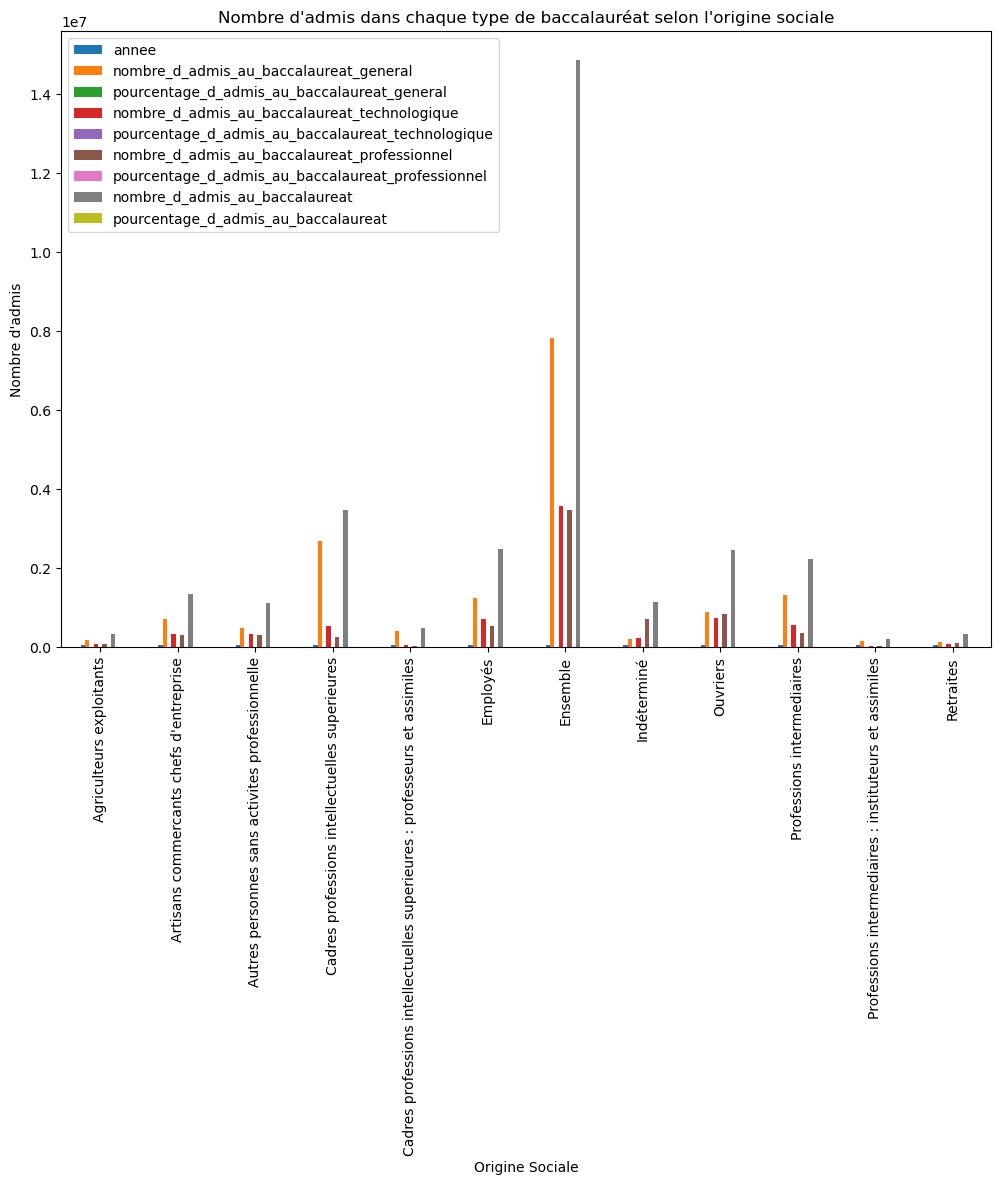

In [10]:
# Regroupement des données par origine sociale et somme du nombre d'admis dans chaque type de baccalauréat
data_grouped = df.groupby('origine_sociale').sum()

# Création de l'histogramme
data_grouped.plot(kind='bar', figsize=(12, 8))
plt.title("Nombre d'admis dans chaque type de baccalauréat selon l'origine sociale")
plt.xlabel('Origine Sociale')
plt.ylabel('Nombre d\'admis')
plt.xticks(rotation='vertical')
plt.show()

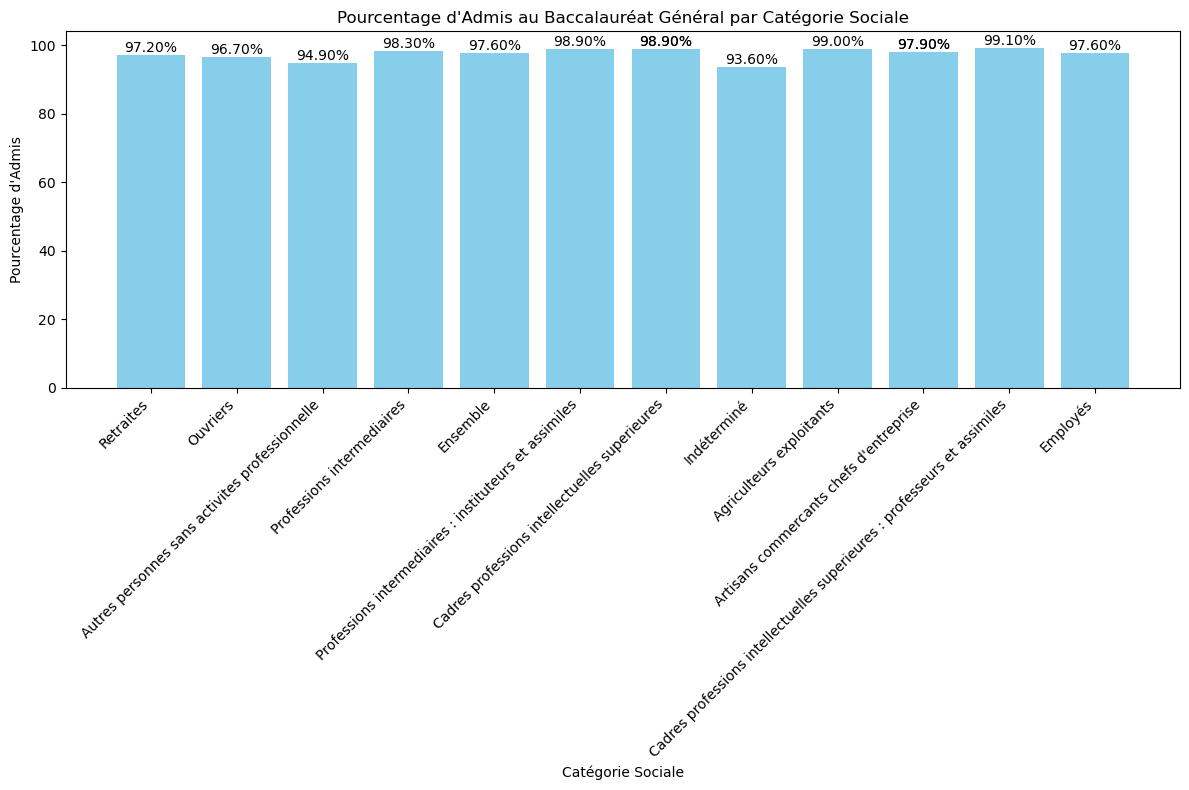

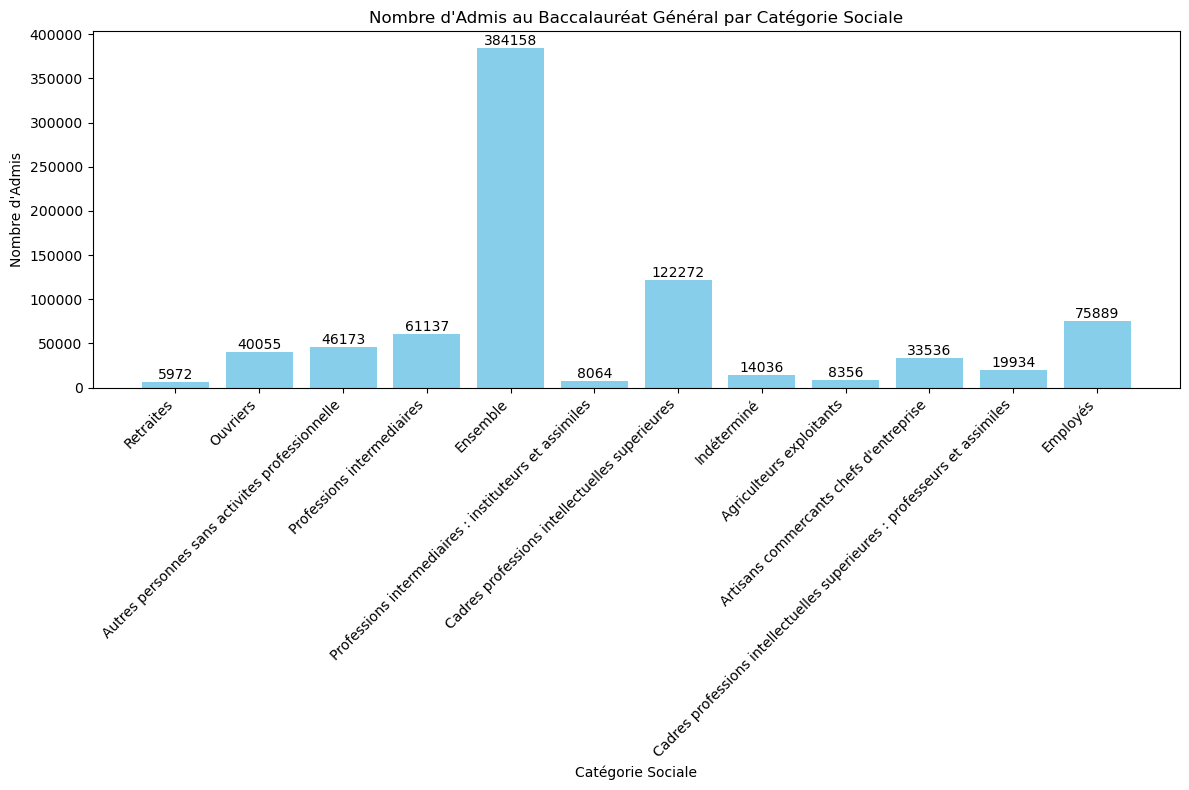

In [11]:
# Calculer le pourcentage le plus élevé pour chaque origine sociale
max_percentages = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_general'].max()

# Tracer le graphique pourcentage d'admis au baccalauréat général par catégorie sociale
plt.figure(figsize=(12, 8))
bars = plt.bar(df['origine_sociale'], df['pourcentage_d_admis_au_baccalaureat_general'], color='skyblue')
plt.title("Pourcentage d'Admis au Baccalauréat Général par Catégorie Sociale")
plt.xlabel("Catégorie Sociale")
plt.ylabel("Pourcentage d'Admis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter le pourcentage le plus élevé pour chaque origine sociale sur le graphique
for index, bar in enumerate(bars):
    origine_sociale = df.loc[index, 'origine_sociale']
    max_percentage = max_percentages[origine_sociale]
    if bar.get_height() == max_percentage:
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f'{max_percentage:.2f}%', ha='center', va='bottom')

plt.show()

# Calculer le nombre maximum d'admis pour chaque origine sociale
max_admis = df.groupby('origine_sociale')['nombre_d_admis_au_baccalaureat_general'].max()

# Tracer le graphique du nombre d'admis au baccalauréat général par catégorie sociale
plt.figure(figsize=(12, 8))
bars = plt.bar(df['origine_sociale'], df['nombre_d_admis_au_baccalaureat_general'], color='skyblue')
plt.title("Nombre d'Admis au Baccalauréat Général par Catégorie Sociale")
plt.xlabel("Catégorie Sociale")
plt.ylabel("Nombre d'Admis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter le nombre d'admis le plus élevé pour chaque origine sociale sur le graphique
for index, bar in enumerate(bars):
    origine_sociale = df.loc[index, 'origine_sociale']
    max_admis_value = max_admis[origine_sociale]
    if bar.get_height() == max_admis_value:
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f'{max_admis_value}', ha='center', va='bottom')

plt.show()


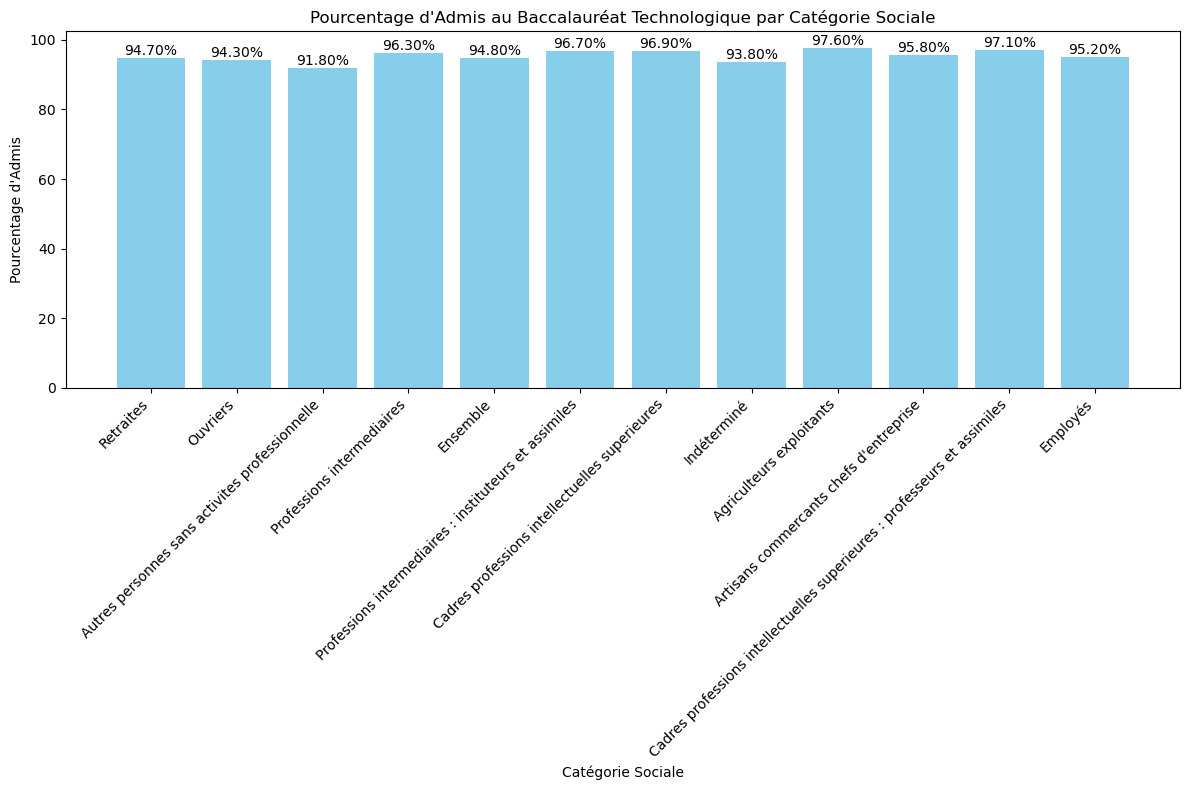

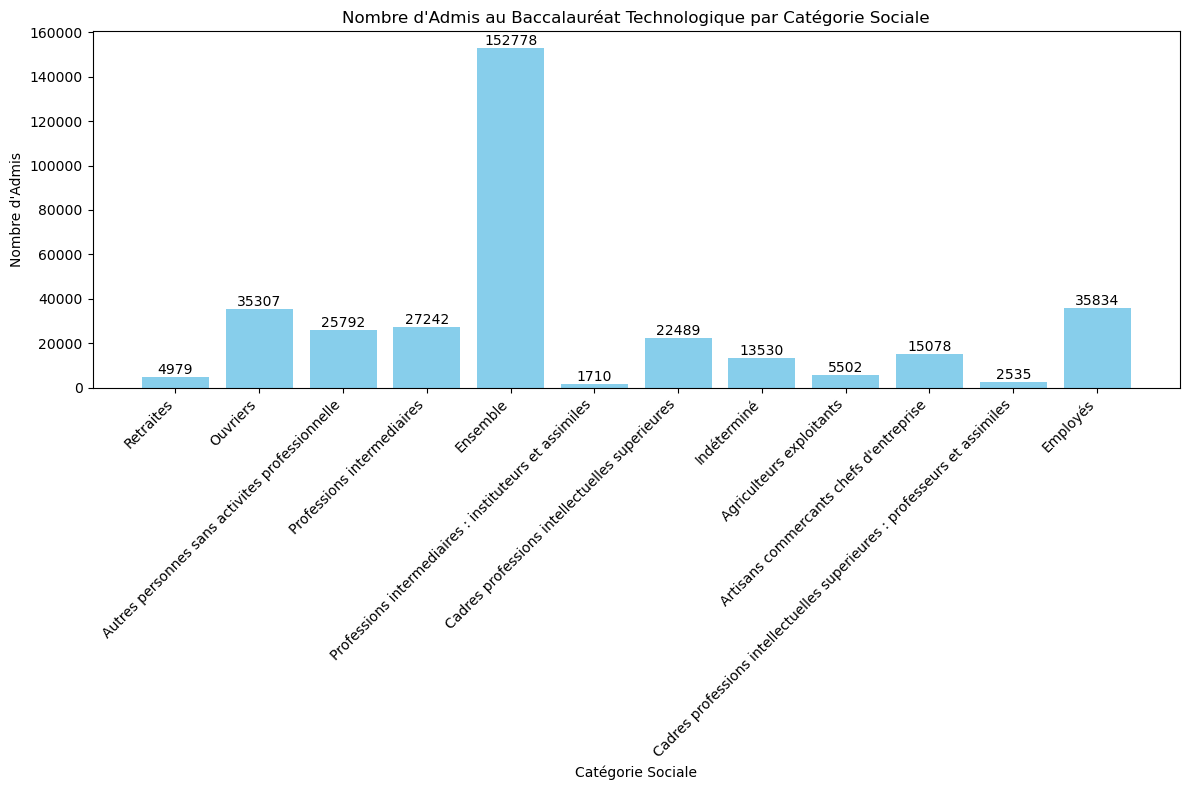

In [12]:
# Calculer le pourcentage le plus élevé pour chaque origine sociale
max_percentages = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_technologique'].max()

# Tracer le graphique pourcentage d'admis au baccalauréat technologique par catégorie sociale
plt.figure(figsize=(12, 8))
bars = plt.bar(df['origine_sociale'], df['pourcentage_d_admis_au_baccalaureat_technologique'], color='skyblue')
plt.title("Pourcentage d'Admis au Baccalauréat Technologique par Catégorie Sociale")
plt.xlabel("Catégorie Sociale")
plt.ylabel("Pourcentage d'Admis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter le pourcentage le plus élevé pour chaque origine sociale sur le graphique
for index, bar in enumerate(bars):
    origine_sociale = df.loc[index, 'origine_sociale']
    max_percentage = max_percentages[origine_sociale]
    if bar.get_height() == max_percentage:
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f'{max_percentage:.2f}%', ha='center', va='bottom')

plt.show()

# Calculer le nombre maximum d'admis pour chaque origine sociale
max_admis = df.groupby('origine_sociale')['nombre_d_admis_au_baccalaureat_technologique'].max()

# Tracer le graphique du nombre d'admis au baccalauréat technologique par catégorie sociale
plt.figure(figsize=(12, 8))
bars = plt.bar(df['origine_sociale'], df['nombre_d_admis_au_baccalaureat_technologique'], color='skyblue')
plt.title("Nombre d'Admis au Baccalauréat Technologique par Catégorie Sociale")
plt.xlabel("Catégorie Sociale")
plt.ylabel("Nombre d'Admis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter le nombre d'admis le plus élevé pour chaque origine sociale sur le graphique
for index, bar in enumerate(bars):
    origine_sociale = df.loc[index, 'origine_sociale']
    max_admis_value = max_admis[origine_sociale]
    if bar.get_height() == max_admis_value:
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f'{max_admis_value}', ha='center', va='bottom')

plt.show()



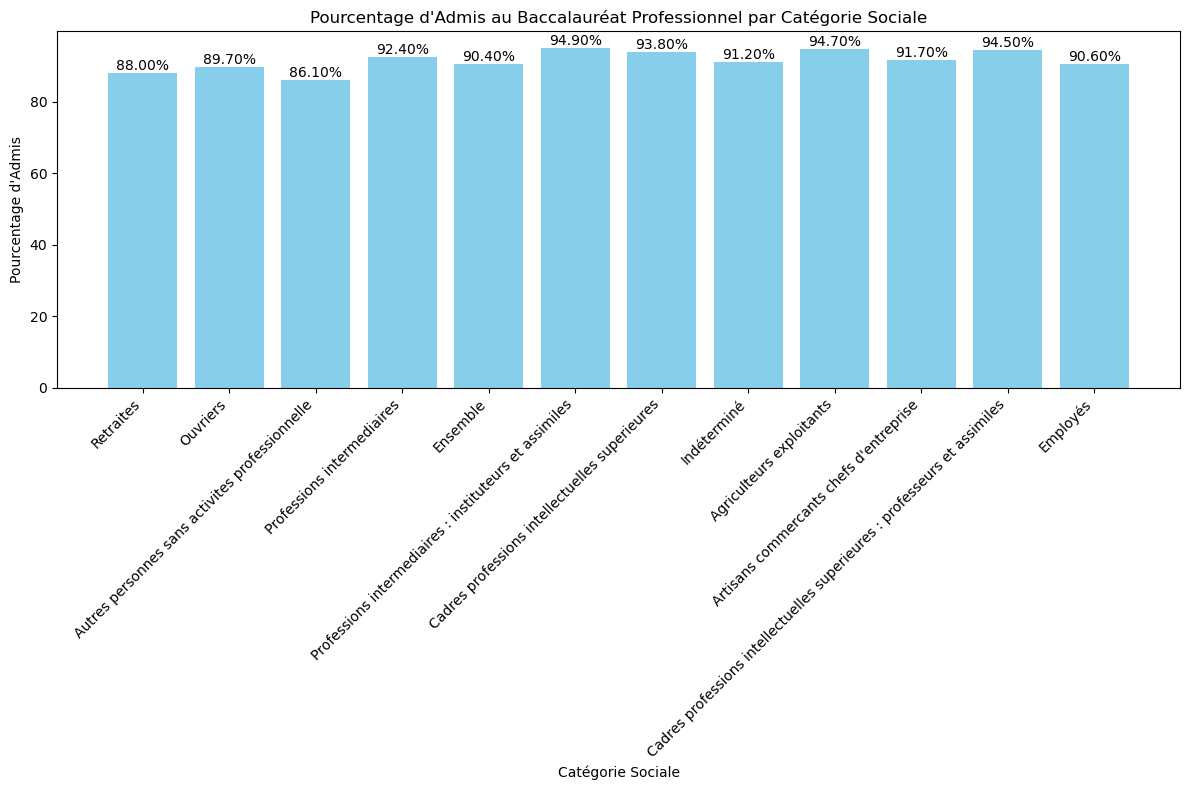

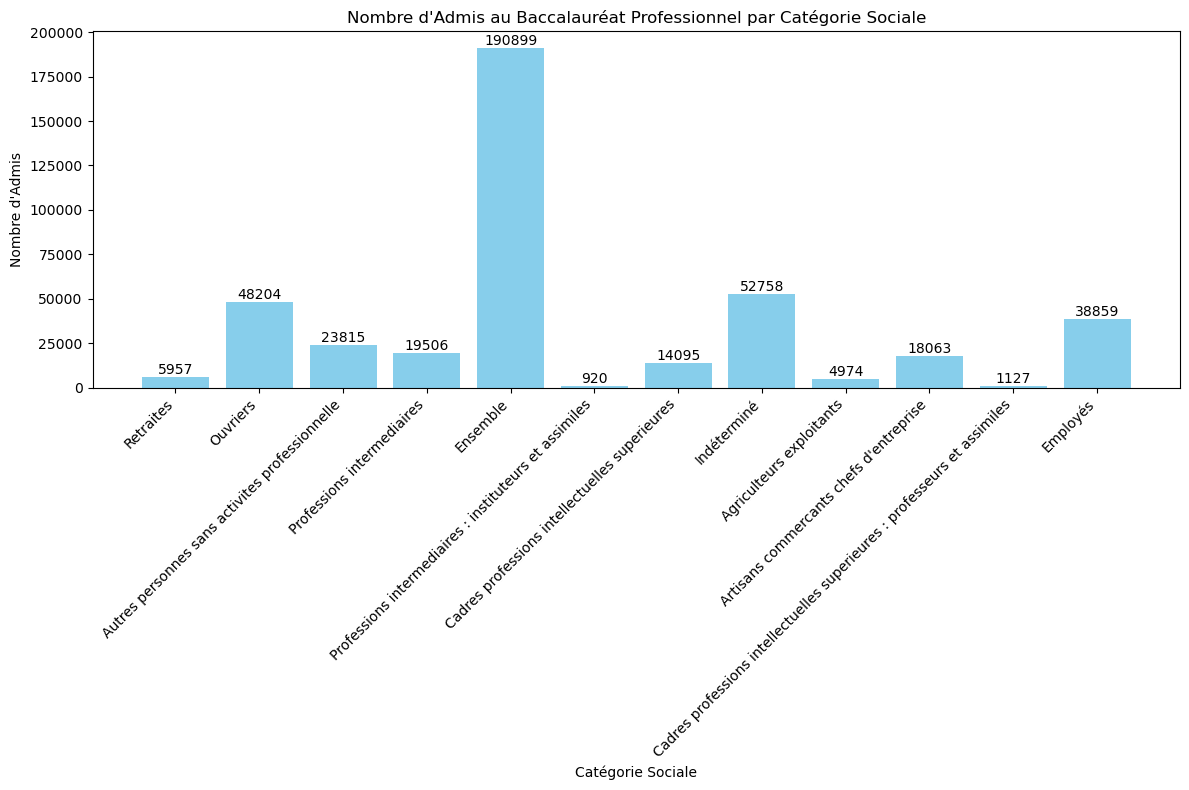

In [13]:
# Calculer le pourcentage le plus élevé pour chaque origine sociale
max_percentages_pro = df.groupby('origine_sociale')['pourcentage_d_admis_au_baccalaureat_professionnel'].max()

# Tracer le graphique pourcentage d'admis au baccalauréat professionnel par catégorie sociale
plt.figure(figsize=(12, 8))
bars_pro = plt.bar(df['origine_sociale'], df['pourcentage_d_admis_au_baccalaureat_professionnel'], color='skyblue')
plt.title("Pourcentage d'Admis au Baccalauréat Professionnel par Catégorie Sociale")
plt.xlabel("Catégorie Sociale")
plt.ylabel("Pourcentage d'Admis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter le pourcentage le plus élevé pour chaque origine sociale sur le graphique
for index, bar_pro in enumerate(bars_pro):
    origine_sociale_pro = df.loc[index, 'origine_sociale']
    max_percentage_pro = max_percentages_pro[origine_sociale_pro]
    if bar_pro.get_height() == max_percentage_pro:
        plt.text(bar_pro.get_x() + bar_pro.get_width()/2.0, bar_pro.get_height(), f'{max_percentage_pro:.2f}%', ha='center', va='bottom')

plt.show()

# Calculer le nombre maximum d'admis pour chaque origine sociale
max_admis_pro = df.groupby('origine_sociale')['nombre_d_admis_au_baccalaureat_professionnel'].max()

# Tracer le graphique du nombre d'admis au baccalauréat professionnel par catégorie sociale
plt.figure(figsize=(12, 8))
bars_pro = plt.bar(df['origine_sociale'], df['nombre_d_admis_au_baccalaureat_professionnel'], color='skyblue')
plt.title("Nombre d'Admis au Baccalauréat Professionnel par Catégorie Sociale")
plt.xlabel("Catégorie Sociale")
plt.ylabel("Nombre d'Admis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter le nombre d'admis le plus élevé pour chaque origine sociale sur le graphique
for index, bar_pro in enumerate(bars_pro):
    origine_sociale_pro = df.loc[index, 'origine_sociale']
    max_admis_value_pro = max_admis_pro[origine_sociale_pro]
    if bar_pro.get_height() == max_admis_value_pro:
        plt.text(bar_pro.get_x() + bar_pro.get_width()/2.0, bar_pro.get_height(), f'{max_admis_value_pro}', ha='center', va='bottom')

plt.show()



In [14]:
#Vérifier si la colonne "Ensemble" représente la somme des autres colonnes

# Calcule de la somme totale de la colonne "Ensemble"
somme_ensemble = df['nombre_d_admis_au_baccalaureat'][df['origine_sociale'] == 'Ensemble'].sum()

# Calcule de la somme des autres colonnes pour chaque catégorie d'origine sociale
somme_autres_colonnes = df[df['origine_sociale'] != 'Ensemble'].groupby('origine_sociale')['nombre_d_admis_au_baccalaureat'].sum()

# Comparaison des deux valeurs
verification = (somme_ensemble == somme_autres_colonnes.sum())

print("Somme totale de la colonne 'Ensemble':", somme_ensemble)
print("Somme des autres colonnes pour chaque catégorie d'origine sociale:")
print(somme_autres_colonnes)
print("Les deux sommes sont-elles égales ?", verification)



Somme totale de la colonne 'Ensemble': 14857154
Somme des autres colonnes pour chaque catégorie d'origine sociale:
origine_sociale
Agriculteurs exploitants                                                      326304
Artisans commercants chefs d'entreprise                                      1339142
Autres personnes sans activites professionnelle                              1109524
Cadres professions intellectuelles superieures                               3473272
Cadres professions intellectuelles superieures : professeurs et assimiles     488027
Employés                                                                     2472349
Indéterminé                                                                  1131703
Ouvriers                                                                     2448800
Professions intermediaires                                                   2231633
Professions intermediaires : instituteurs et assimiles                        198278
Retraites          

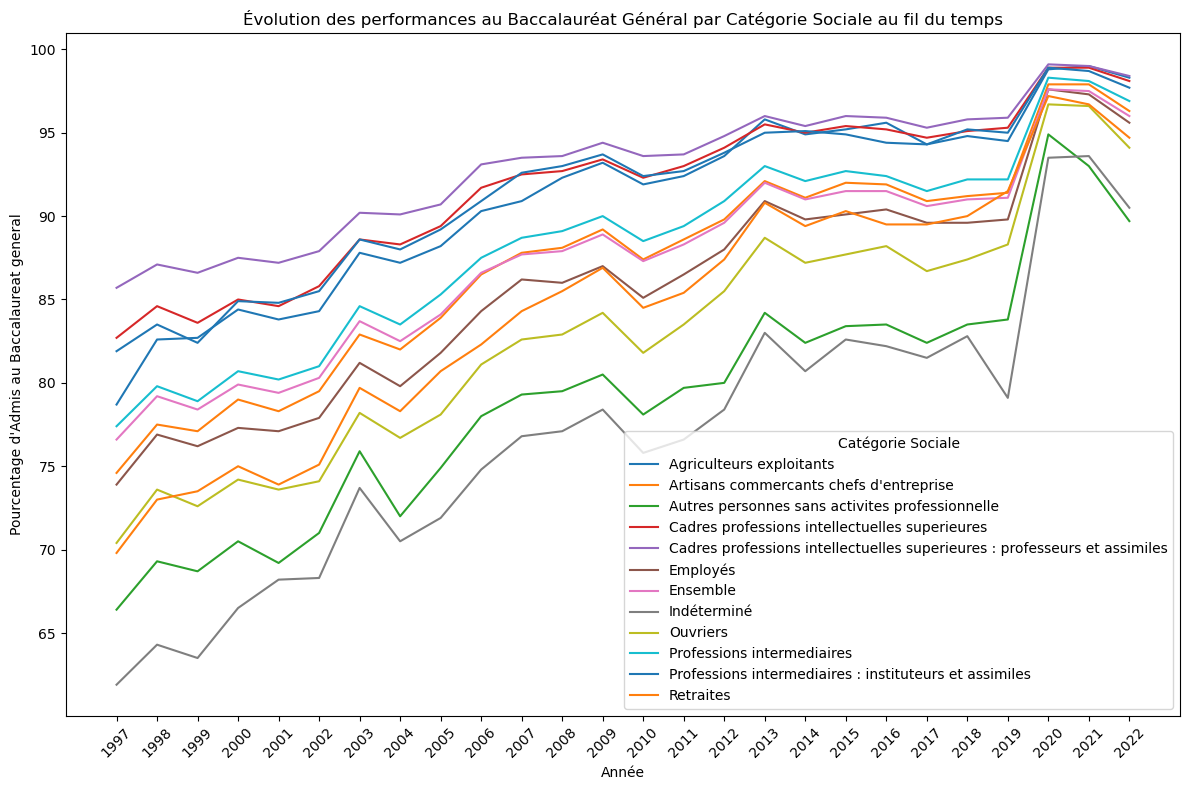

In [15]:
# Regroupement des données par année et catégorie sociale
grouped_data = df.groupby(['annee', 'origine_sociale']).mean().reset_index()

# Filtre pour ne garder que les données sur le baccalauréat général
general_data = grouped_data[['annee', 'origine_sociale', 'pourcentage_d_admis_au_baccalaureat_general']]

# Création de graphiques pour différentes catégories sociales
categories_sociales = general_data['origine_sociale'].unique()

plt.figure(figsize=(12, 8))

for categorie in categories_sociales:
    data_categorie = general_data[general_data['origine_sociale'] == categorie]
    plt.plot(data_categorie['annee'], data_categorie['pourcentage_d_admis_au_baccalaureat_general'], label=categorie)

plt.title("Évolution des performances au Baccalauréat Général par Catégorie Sociale au fil du temps")
plt.xlabel("Année")
plt.ylabel("Pourcentage d'Admis au Baccalaureat general")
plt.legend(title='Catégorie Sociale')
plt.xticks(data_categorie['annee'], rotation=45)
plt.tight_layout()
plt.show()


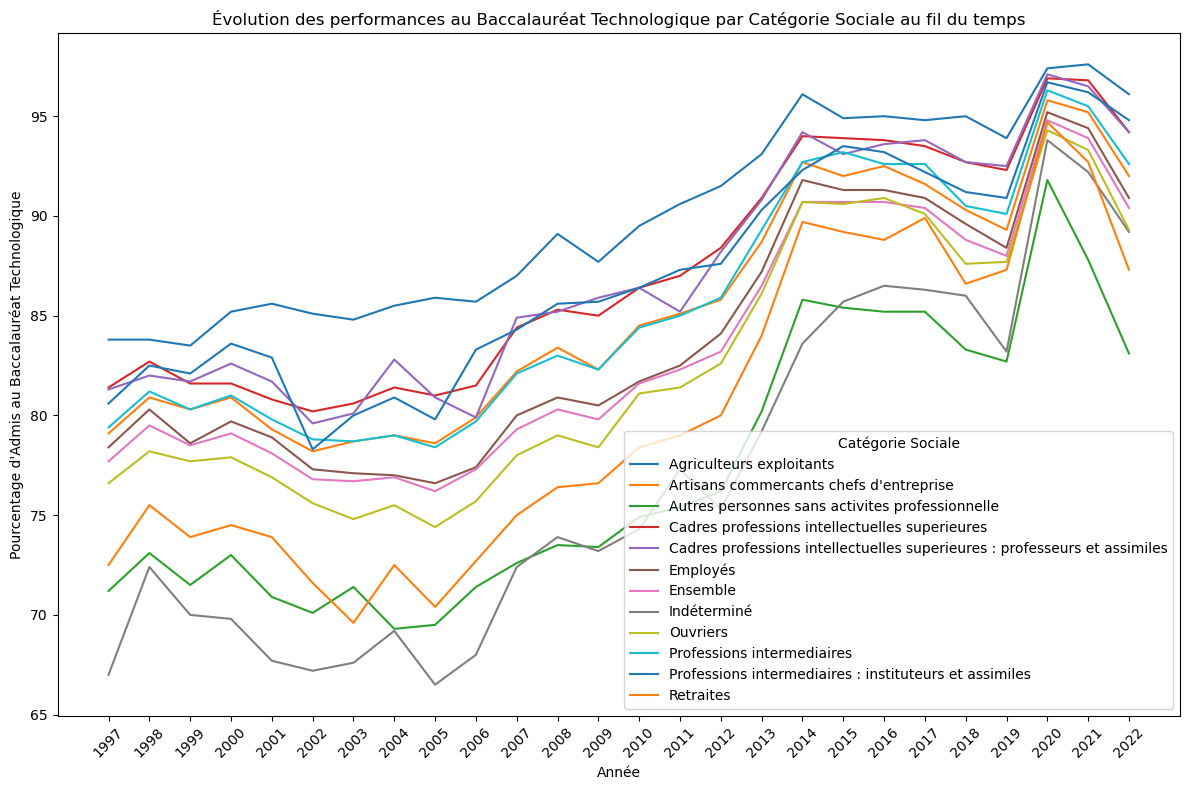

In [16]:
# Filtre pour ne garder que les données sur le baccalauréat technologique
techno_data = grouped_data[['annee', 'origine_sociale', 'pourcentage_d_admis_au_baccalaureat_technologique']]

plt.figure(figsize=(12, 8))

for categorie in categories_sociales:
    data_categorie = techno_data[techno_data['origine_sociale'] == categorie]
    plt.plot(data_categorie['annee'], data_categorie['pourcentage_d_admis_au_baccalaureat_technologique'], label=categorie)

plt.title("Évolution des performances au Baccalauréat Technologique par Catégorie Sociale au fil du temps")
plt.xlabel("Année")
plt.ylabel("Pourcentage d'Admis au Baccalauréat Technologique")
plt.legend(title='Catégorie Sociale')
plt.xticks(data_categorie['annee'], rotation=45)
plt.tight_layout()
plt.show()


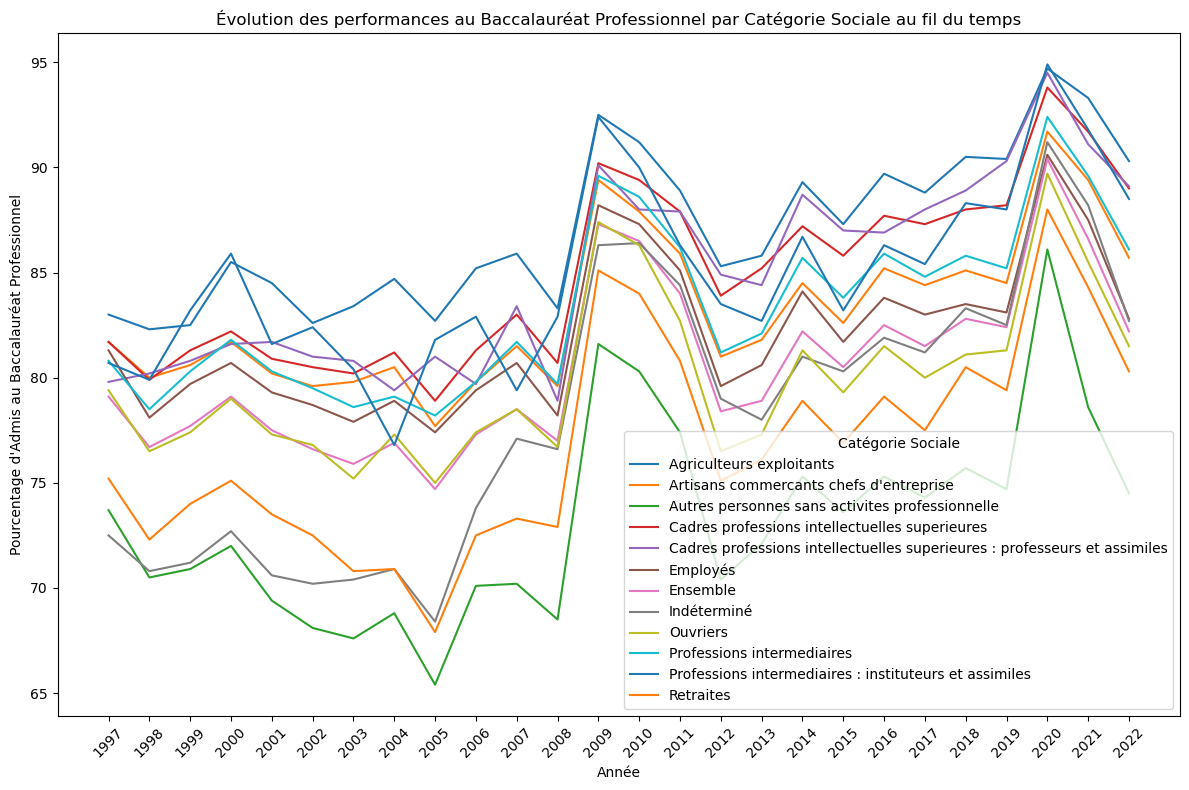

In [17]:
# Filtre pour ne garder que les données sur le baccalauréat professionnel
pro_data = grouped_data[['annee', 'origine_sociale', 'pourcentage_d_admis_au_baccalaureat_professionnel']]

plt.figure(figsize=(12, 8))

for categorie in categories_sociales:
    data_categorie = pro_data[pro_data['origine_sociale'] == categorie]
    plt.plot(data_categorie['annee'], data_categorie['pourcentage_d_admis_au_baccalaureat_professionnel'], label=categorie)

plt.title("Évolution des performances au Baccalauréat Professionnel par Catégorie Sociale au fil du temps")
plt.xlabel("Année")
plt.ylabel("Pourcentage d'Admis au Baccalauréat Professionnel")
plt.legend(title='Catégorie Sociale')
plt.xticks(data_categorie['annee'], rotation=45)
plt.tight_layout()
plt.show()
